In [3]:
import pandas as pd
import numpy as np
import scipy
import matplotlib.pyplot as plt
import statistics as stats
import seaborn as sns; sns.set(style ='white', color_codes = True)
import codes
%load_ext autoreload
%autoreload 2

In [4]:
fmld171 = pd.read_csv('diary17/fmld171.csv', dtype={'NEWID': str, 'HIGH_EDU': str})
fmld172 = pd.read_csv('diary17/fmld172.csv', dtype={'NEWID': str, 'HIGH_EDU': str})
fmld173 = pd.read_csv('diary17/fmld173.csv', dtype={'NEWID': str, 'HIGH_EDU': str})
fmld174 = pd.read_csv('diary17/fmld174.csv', dtype={'NEWID': str, 'HIGH_EDU': str})

In [5]:
cex = [fmld171, fmld172, fmld173, fmld174]

In [6]:
cex_data = pd.concat(cex, ignore_index = True)

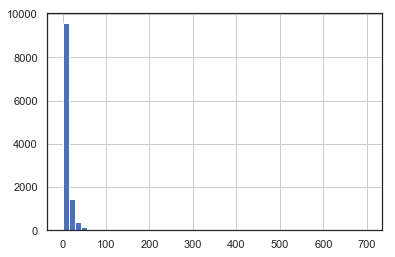

In [7]:
meat_column = ['BEEF','PORK','OTHMEAT','POULTRY','SEAFOOD']
cex_data['meat_spent'] = sum(cex_data[column] for column in meat_column)
cex_data['meat_per_person'] = cex_data['meat_spent']/cex_data['FAM_SIZE']
cex_data['meat_per_person'].hist(bins=50)
# np.subtract(np.log(cex_data[cex_data['meat_per_person'] > 0]['meat_per_person']),2).hist(bins=50)

In [8]:
cex_data['meat_log'] = np.log(cex_data[cex_data['meat_per_person'] > 0]['meat_per_person'])
cex_data['alcbev_log'] = np.log(cex_data[cex_data['ALCBEV'] > 0]['ALCBEV'])
cex_data['smoke_log'] = np.log(cex_data[cex_data['SMOKSUPP'] > 0]['SMOKSUPP'])

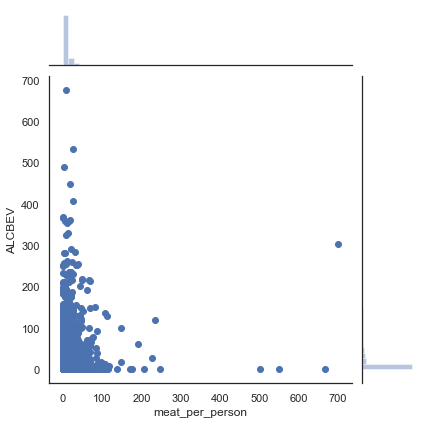

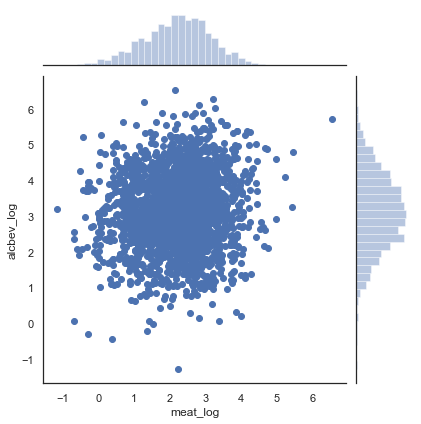

In [9]:
sns.jointplot(x= 'meat_per_person', y = 'ALCBEV', data=cex_data)
sns.jointplot(x='meat_log', y = 'alcbev_log', data=cex_data)

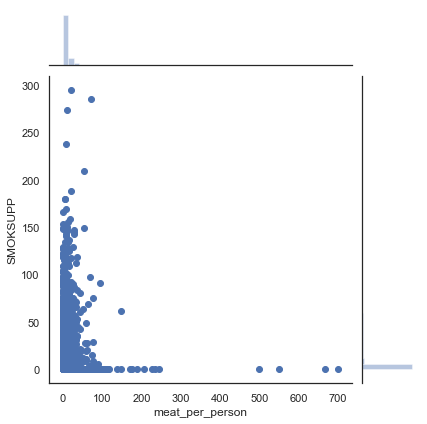

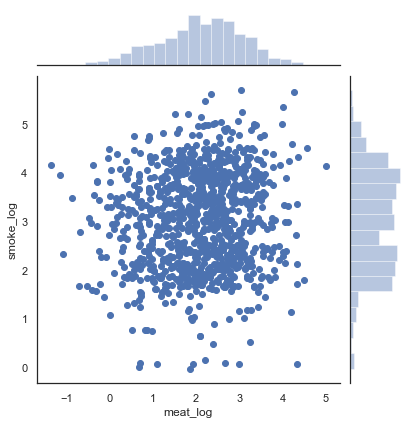

In [10]:
# Plot Meat x Smoke and Log Meat x Log Smoke
sns.jointplot(x= 'meat_per_person', y = 'SMOKSUPP', data=cex_data)
sns.jointplot(x='meat_log', y='smoke_log', data=cex_data)

In [11]:
veggie_column = ['FRSHFRUT','FRSHVEG','PROCFRUT','PROCVEG']
cex_data['veggie_spent'] = sum(cex_data[column] for column in veggie_column)
cex_data['veggie_per_person'] = cex_data['veggie_spent']/cex_data['FAM_SIZE']
cex_data['veggie_log'] = np.log(cex_data[cex_data['veggie_per_person'] > 0]['veggie_per_person'])

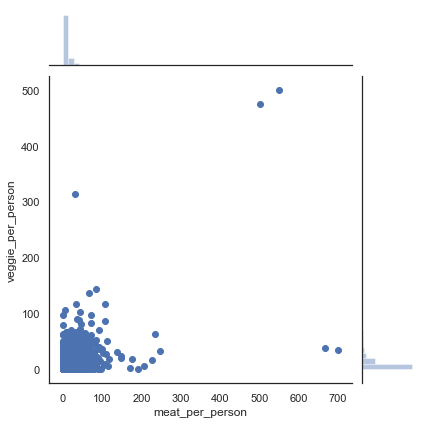

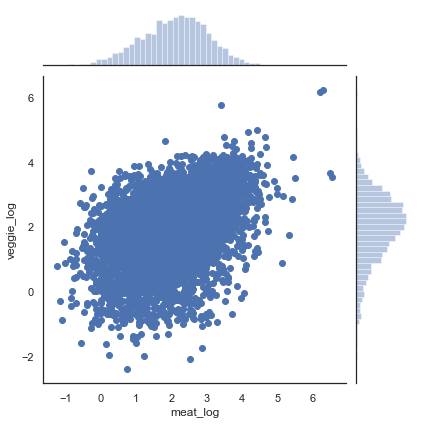

In [12]:
# Plot Meat x Veggie and Log Meat x Log Veggie
sns.jointplot(x= 'meat_per_person', y = 'veggie_per_person', data=cex_data)
sns.jointplot(x='meat_log', y='veggie_log', data=cex_data)

Get Dummies for education

In [13]:
edu_df = pd.get_dummies(cex_data['HIGH_EDU'], prefix='EDU')
edu_df.rename(mapper=codes.education, inplace=True, axis=1)
cex_data = cex_data.merge(edu_df, left_index=True, right_index=True)

Plot Boxplot for Education 

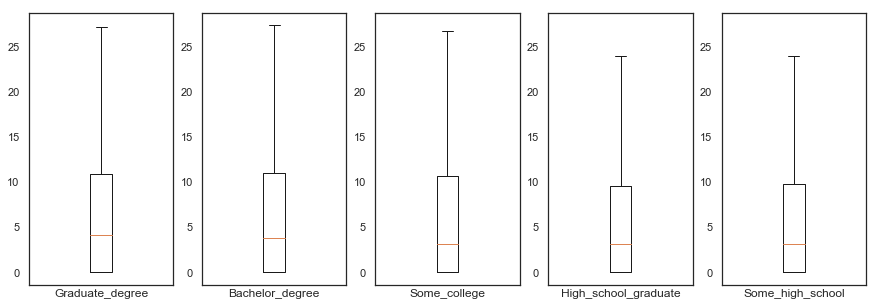

In [14]:
fig, ax = plt.subplots(1,5, figsize = (15,5))
edu_levels = ['Some_high_school', 'High_school_graduate', 'Some_college', 'Bachelor_degree', 'Graduate_degree']
fig.subplots_adjust(hspace = 1.2,left=None, bottom=None, right=None, top=None,wspace=None)
ax[0].boxplot(cex_data[cex_data['Graduate_degree'] == 1]['meat_per_person'], positions = [1], sym=  '')
ax[1].boxplot(cex_data[cex_data['Bachelor_degree'] == 1]['meat_per_person'], positions = [3], sym= '')
ax[2].boxplot(cex_data[cex_data['High_school_graduate'] == 1]['meat_per_person'], positions = [5], sym= '')
ax[3].boxplot(cex_data[cex_data['Some_college'] == 1]['meat_per_person'], positions = [7], sym= '')
ax[4].boxplot(cex_data[cex_data['Some_high_school'] == 1]['meat_per_person'], positions = [9], sym='')
y_limits = []
for axis in ax:
    y_limits.append(axis.get_ylim())

for edu_level, axis in zip(edu_levels[::-1], ax):
    axis.set_ylim(min([limit[0] for limit in y_limits]), max([limit[1] for limit in y_limits]))
    axis.set_xlabel(edu_level)
    axis.set_xticks([])
plt.show()

Check the means of High Education x Meat Per Person

In [15]:
for edu_level in edu_levels:
    print(edu_level, cex_data[cex_data[edu_level] == 1]['meat_per_person'].mean())

Some_high_school 11.399704631751945
High_school_graduate 7.59483960444402
Some_college 7.029656879109302
Bachelor_degree 8.141240073583903
Graduate_degree 8.040829495004605


Check the means of High Education x Family Size

In [16]:
for edu_level in edu_levels:
    print(edu_level, cex_data[cex_data[edu_level] == 1]['FAM_SIZE'].mean())

Some_high_school 2.3227611940298507
High_school_graduate 2.266698024459078
Some_college 2.408875484704869
Bachelor_degree 2.531928900592495
Graduate_degree 2.618917689859027


Check the means of High Education x Financial Income

In [17]:
for edu_level in edu_levels:
    print(edu_level, cex_data[cex_data[edu_level] == 1]['FINCBEF5'].mean())

Some_high_school 28669.152985074626
High_school_graduate 43127.01222953904
Some_college 55689.69237397674
Bachelor_degree 97063.21757735353
Graduate_degree 139404.6539336062


Collecting Urban and Rurals x Income

In [18]:
mpp_vs_income_urban = cex_data[(cex_data['BLS_URBN'] == 1) & (cex_data['FINCBEF5'] > 0)]['meat_per_person']/\
                cex_data[(cex_data['BLS_URBN'] == 1) & (cex_data['FINCBEF5'] > 0)]['FINCBEF5']

mpp_vs_income_rural = cex_data[(cex_data['BLS_URBN'] == 2) & (cex_data['FINCBEF5'] > 0)]['meat_per_person']/\
                cex_data[(cex_data['BLS_URBN'] == 2) & (cex_data['FINCBEF5'] > 0)]['FINCBEF5']
print(" urban", mpp_vs_income_urban.mean(), "\n", "rural", mpp_vs_income_rural.mean())


 urban 0.003708400629546656 
 rural 0.0004511685122968241


Get Dummies Gender

In [19]:
# Reference Male and Female x Get dummies
cex_data['SEX_REF'] = np.where(cex_data['SEX_REF'] == 1,'Male', 'Female')
sex_df = pd.get_dummies(cex_data['SEX_REF'])
cex_data = cex_data.merge(sex_df, left_index=True, right_index=True)

Place Men and Women in variable to view who buys more meat

In [20]:
men_meat = cex_data[(cex_data['SEX_REF'] == 'Male') &(cex_data['meat_log'] > 0)\
                    & (cex_data['meat_log'] < 100)]['meat_log']
women_meat =cex_data[(cex_data['SEX_REF'] == 'Female') & (cex_data['meat_log'] > 0)\
                & (cex_data['meat_log'] < 100)]['meat_log']

In [21]:
# Place Men and Women in variable to view who buys more veggies
men_veggie = cex_data[(cex_data['SEX_REF'] == 'Male') & (cex_data['veggie_log'] > 0)\
                     & (cex_data['veggie_log'] < 70)]['veggie_log']

women_veggie = cex_data[(cex_data['SEX_REF'] == 'Female') & (cex_data['veggie_log'] > 0)\
                       & (cex_data['veggie_log'] < 70)]['veggie_log']

Plot Men x Women veggie x Meat

224.0
186.0


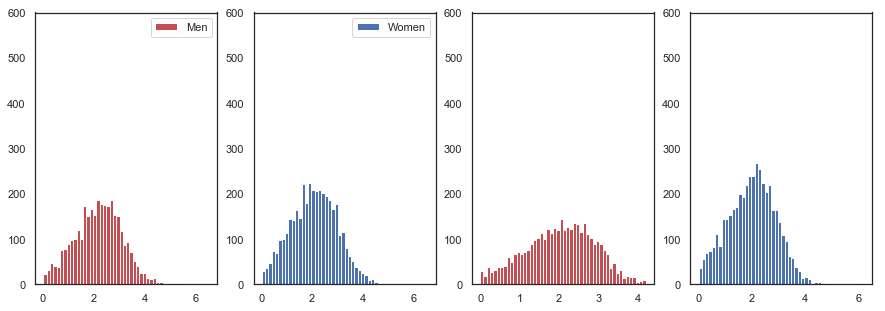

In [22]:
fig, ax = plt.subplots(1,4, figsize = (15,5))
men = 'Men'
women = 'Women'
men_meat_n, men_meat_bins, men_meat_patches = ax[0].hist(men_meat, color= 'r', bins = 50, label = men)
women_meat_n, women_meat_bins, women_meat_patches = ax[1].hist(women_meat, bins = 50, label = women)
men_veggie_n, men_veggie_bins, men_veggie_patches = ax[2].hist(men_veggie, color = 'r', bins = 50, label = men)
women_veggie_n, women_veggie_bins, women_veggie_patches = ax[3].hist(women_veggie, bins = 50, label = women)
[axis.set_ylim([0, 600]) for axis in ax]
print(women_meat_n[np.argmax(women_meat_n)])
print(men_meat_n[np.argmax(men_meat_n)])
ax[0].legend()
ax[1].legend()
plt.show()

Histogram Plot Men x Women x Veggie x Meat

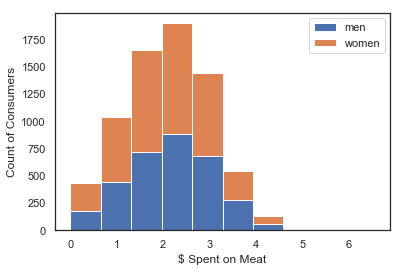

In [23]:
fig, axes = plt.subplots()
labels = ['men', 'women']
x = [men_meat, women_meat]
axes.hist(x, bins = 10, histtype='bar', stacked=True, label = labels)
plt.legend(labels)
plt.xlabel('$ Spent on Meat')
plt.ylabel('Count of Consumers')
plt.show()

Get Dummies Occupation

In [24]:
cex_data['OCCULIS1'] = cex_data['OCCULIS1'].fillna(18.0).astype('int64')
cex_data['OCCULIS1'] = cex_data['OCCULIS1'].apply(lambda x: codes.occupation['SHORT_OCC'][x] if x is not None else 18)
occ_df = pd.get_dummies(cex_data['OCCULIS1'], prefix = 'OCC')
cex_data = cex_data.merge(occ_df, right_index = True, left_index= True)

BoxPlot Occupation x Meat Person

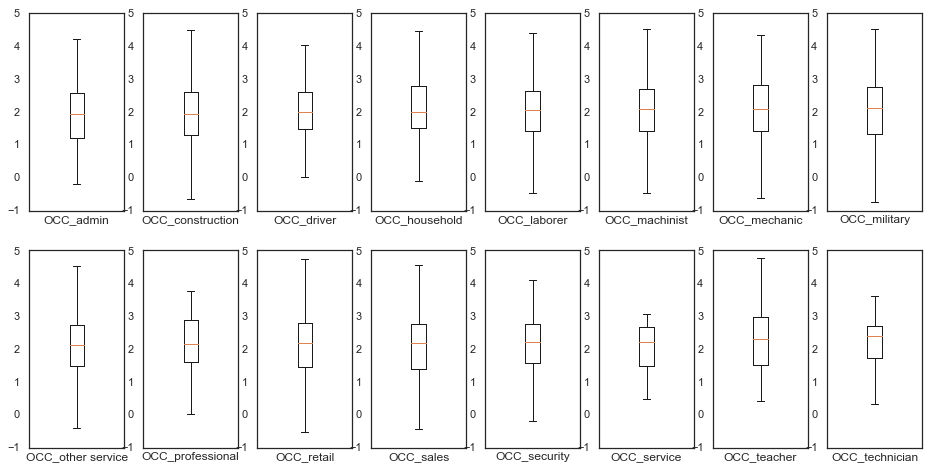

In [25]:
import sys
fig, ax = plt.subplots(2,8, figsize = (16,8))

medians = cex_data.groupby('OCCULIS1').median()['meat_log'].to_dict()
medians = {'OCC_' + k: v for k, v in medians.items()}
medians = sorted(medians.items(), key=lambda x: x[1])
[ax.flat[idx].boxplot(cex_data[(cex_data[occupation] == 1) & (cex_data['meat_per_person'] > 0)]['meat_log'], sym='') \
    for idx, (occupation, log_of_median_meat_spend) in enumerate(medians) for axis in ax]

y_limits = []
for idx in range(len(occ_df.columns)):
    y_limits.append(ax.flat[idx].get_ylim())
min_y = min([limit[0] for limit in y_limits])
max_y = max([limit[1] for limit in y_limits])
for axis, job in zip(ax.flat, occ_df.columns):
    axis.set_xlabel(job)
    axis.set_xticks([])
    axis.set_ylim(min_y, max_y)

plt.show()

Pearsons Test on Features x Meat per person

In [26]:
for column in ('FINCBEF5', 'AGE_REF', 'ALCBEV', 'SMOKSUPP'):
    print((column, 'meat_log'), scipy.stats.pearsonr(cex_data[cex_data['meat_log'] > 0][column], cex_data[cex_data['meat_log'] > 0]['meat_log']))

print(('veggie_log', 'meat_log'), scipy.stats.pearsonr(cex_data[(cex_data['meat_log'] > 0) & (cex_data['veggie_log'] > 0)]['FINCBEF5'], cex_data[(cex_data['meat_log'] > 0) & (cex_data['veggie_log'] > 0)]['veggie_log']))
print(('Income', 'veggie_log'), scipy.stats.pearsonr(cex_data[cex_data['veggie_log'] > 0]['FINCBEF5'], cex_data[cex_data['veggie_log'] > 0]['veggie_log']))
print(('Age', 'veggie_log'), scipy.stats.pearsonr(cex_data[cex_data['veggie_log'] > 0]['AGE_REF'], cex_data[cex_data['veggie_log'] > 0]['veggie_log']))


('FINCBEF5', 'meat_log') (0.009258837472683603, 0.4333994393074597)
('AGE_REF', 'meat_log') (0.13704296391664506, 2.2966895975968685e-31)
('ALCBEV', 'meat_log') (0.09769985103194057, 1.1711122617394483e-16)
('SMOKSUPP', 'meat_log') (0.048460402664110856, 4.0863187494293154e-05)
('veggie_log', 'meat_log') (0.06222916446859842, 6.261620696347673e-07)
('Income', 'veggie_log') (0.06628805441991353, 2.5375100240864984e-09)
('Age', 'veggie_log') (0.11082596017779804, 1.8164093860939927e-23)


Get Dummies Generation

In [27]:
cex_data['generation'] = cex_data['REFGEN'].apply(lambda x: codes.refgen[x])
gen_df = pd.get_dummies(cex_data['generation'])
cex_data = cex_data.merge(gen_df, left_index=True, right_index=True)
[(generation, cex_data[cex_data[generation] == 1]['meat_per_person'].mean()) for generation in gen_df.columns]

[('Baby_boomers', 9.57414173629426),
 ('Gen_x', 7.409896708624153),
 ('Greatest_gen', 8.030506348973892),
 ('Millennials', 5.590140486781127)]

Get Dummies Region

In [28]:
cex_data['REGION'] = cex_data['REGION'].fillna(0)
cex_data['region'] = cex_data['REGION'].apply(lambda x: codes.region[int(x)])
region_df = pd.get_dummies(cex_data['region'])
cex_data = cex_data.merge(region_df, left_index=True, right_index=True)

Mean of Region x Meat Per Person and Median of Region x Financial Income

In [29]:
print([(region, cex_data[(cex_data[region] == 1) & (cex_data['meat_per_person'] > 0)]['meat_log'].mean()) for region in region_df.columns])
[(region, cex_data[cex_data[region] == 1]['FINCBEF5'].median()) for region in region_df.columns]

[('Midwest', 1.9914242726588873), ('Northeast', 2.140364223872673), ('South', 2.048174383307936), ('Unknown', 1.8880854492968344), ('West', 2.078077431971527)]


[('Midwest', 55419.0),
 ('Northeast', 59073.0),
 ('South', 50318.0),
 ('Unknown', 43507.0),
 ('West', 58668.5)]

Get Dummies Income Bucketed

In [30]:
labels = [str(first)+'-'+str(second) for first, second in zip(range(0,840000,20000),range(20000,860000,20000))]
cex_data['bucketed_income'] = pd.cut(cex_data['FINCBEF5'], bins =42,labels=labels)
cex_data['bucketed_income'] = cex_data['bucketed_income'].apply(lambda x: '80000-840000'\
                                                if int(x.split('-')[0]) >= 80000 else x)
income_df = pd.get_dummies(cex_data['bucketed_income'], prefix='Income')
cex_data = cex_data.merge(income_df, left_index=True, right_index=True)

In [31]:
[(income, cex_data[cex_data[income] == 1]['meat_log'].mean()) for income in income_df.columns]

[('Income_0-20000', 1.3660916538023713),
 ('Income_40000-60000', 2.237621858192508),
 ('Income_60000-80000', 2.1951845451047522),
 ('Income_80000-840000', 2.040344431724568)]

Get dummies Marital Status

In [32]:
cex_data['marital_status'] = cex_data['MARITAL1'].apply(lambda x: codes.marital[x])
marital_df = pd.get_dummies(cex_data['marital_status'])
cex_data = cex_data.merge(marital_df, left_index=True, right_index=True)

In [33]:
[(m_status, cex_data[cex_data[m_status] == 1]['meat_log'].mean()) for m_status in marital_df.columns]

[('Divorced', 2.1803658047100583),
 ('Married', 1.9738357807779077),
 ('Never_married', 2.1282869936171807),
 ('Separated', 2.1026312879752975),
 ('Widowed', 2.256405277146652)]

Get dummies Family Size 

In [34]:
cex_data['family_size'] = cex_data['FAM_SIZE'].apply(lambda x: 0 if x > 4 else x)
fam_size_df = pd.get_dummies(cex_data['family_size'], prefix="Fam")
fam_map = {'Fam_0': 'Fam_greater_than_4', 'Fam_1': 'Fam_one_member', 'Fam_2': 'Fam_two_members',\
           'Fam_3': 'Fam_three_members', 'Fam_4': 'Fam_four_members'}
fam_size_df = fam_size_df.rename(mapper=fam_map, axis=1)
cex_data = cex_data.merge(fam_size_df, left_index=True, right_index=True)

In [35]:
[(fam, cex_data[cex_data[fam] == 1]['meat_log'].mean()) for fam in fam_size_df.columns]

[('Fam_greater_than_4', 1.519681827045069),
 ('Fam_one_member', 2.4666996883770236),
 ('Fam_two_members', 2.179414352383363),
 ('Fam_three_members', 1.895635171707699),
 ('Fam_four_members', 1.7120401111223968)]

Modeling Section

In [36]:
from statsmodels.formula.api import ols

Check Resdiuals Function 

In [ ]:
# def checkresiduals(df, target, sm_model):
#     # checking for our model - Homoscedasticity,  Independence of residuals
#     pred_val = sm_model.fittedvalues.copy()
#     true_val = df[target].values.copy()
#     residual = true_val - pred_val

    
#     fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 4))
# #     fig, ax = plt.subplots(figsize=(8, 6))
#     ax1.hist(residual, density=True, bins=30)
#     ax1.set_title('Histogram')
#     ax2.scatter(df[target],residual)
#     ax2.plot(np.unique(df[target]), np.poly1d(np.polyfit(df[target], residual, 1))(np.unique(df[target])), c='Red')
#     print( np.poly1d(np.polyfit(df[target], residual, 1)))
#     ax2.set_title('Scatterplot')
#     plt.show()

Model 1

In [ ]:
# lr_model = ols(formula='meat_per_person~OCC_farmer+OCC_mechanic+OCC_retail+Some_high_school+Q("Income_80000-840000")+West+Northeast+veggie_per_person+EGGS+OILS+NONALBEV+SMOKSUPP+ALCBEV',data=cex_data).fit()

In [ ]:
# checkresiduals(cex_data, 'meat_per_person', lr_model)

In [ ]:
# lr_model.summary()

In [ ]:
# for column_name in grocery_columns:
#     print(column_name, scipy.stats.pearsonr(cex_data[column_name], cex_data['meat_per_person']))

Model 2

In [ ]:




# import sys
# regions = '+'.join(['Northeast','Midwest','West','South'])
# jobs = list(occupation_dictionary.values())
# jobs.remove('OCC_outdoor')
# jobs.remove('OCC_manager')
# jobs.remove('OCC_military')
# Occupations = '+'.join(jobs)
# education_levels = '+'.join(edu_df.columns)
# income_level = '")+Q("'.join(income_df.columns)
# income_level = 'Q("' + income_level + '")'
# lr_model2 = ols(formula='meat_per_person~'+Occupations+'+'+education_levels+'+' + income_level + '+'+regions+'+veggie_per_person+EGGS+OILS+NONALBEV+SMOKSUPP+ALCBEV',data=cex_data).fit()

In [ ]:
# lr_model2.summary()

In [ ]:
# checkresiduals(cex_data, 'meat_per_person', lr_model2)

Model 3

In [ ]:
# import sys
# regions = '+'.join(['Northeast','Midwest','West','South'])
# jobs = list(occupation_dictionary.values())
# jobs.remove('OCC_outdoor')
# jobs.remove('OCC_manager')
# jobs.remove('OCC_military')
# occupations = '+'.join(jobs)
# education_levels = '+'.join(edu_df.columns)
# income_level = '")+Q("'.join(income_df.columns)
# income_level = 'Q("' + income_level + '")'
# generations = '+'.join(gen_df.columns)
# genders = '+'.join(sex_df.columns)
# lr_model3 = ols(formula='meat_per_person~'+occupations+'+'+education_levels+'+' + income_level + '+'+regions+'+veggie_per_person+EGGS+OILS+NONALBEV+SMOKSUPP+ALCBEV+'+generations+'+'+genders,data=cex_data).fit()

In [ ]:
# lr_model3.summary()

In [ ]:
# checkresiduals(cex_data, 'meat_per_person', lr_model3)

Model 4

In [ ]:
# import statsmodels.api as sm
# western_mechanic_hs_male = [0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,50.0,6.0,3.0,7,0,30,1,0,0,0,0,1]
# western_mechanic_hs_male = sm.add_constant(western_mechanic_hs_male)

In [ ]:
# import sys
# regions = '+'.join(['Northeast','Midwest','West','South'])
# jobs = list(occupation_dictionary.values())
# jobs.remove('OCC_outdoor')
# jobs.remove('OCC_manager')
# jobs.remove('OCC_military')
# occupations = '+'.join(jobs)
# education_levels = '+'.join(edu_df.columns)
# income_level = '")+Q("'.join(income_df.columns)
# income_level = 'Q("' + income_level + '")'
# generations = '+'.join(gen_df.columns)
# genders = '+'.join(sex_df.columns)
# fam_sizes = '+'.join(fam_size_df.columns)
# marital_statuses = '+'.join(marital_df.columns)
# lr_model4 = ols(formula='meat_per_person~'+occupations+'+'+education_levels+'+' + income_level + '+'+regions+'+veggie_per_person+EGGS+OILS+NONALBEV+SMOKSUPP+ALCBEV+'+generations+'+'+genders+'+'+marital_statuses+'+'+fam_sizes,data=cex_data).fit()

In [ ]:
# lr_model4.summary()

In [ ]:
# checkresiduals(cex_data, 'meat_per_person', lr_model4)

Model 5

In [ ]:
# import sys
# trunc_df = cex_data[(cex_data['meat_per_person'] > 0) & (cex_data['meat_per_person'] < 100)]
# regions = '+'.join(['Northeast','Midwest','West','South'])
# jobs = list(occupation_dictionary.values())
# jobs.remove('OCC_outdoor')
# jobs.remove('OCC_manager')
# jobs.remove('OCC_military')
# occupations = '+'.join(jobs)
# education_levels = '+'.join(edu_df.columns)
# income_level = '")+Q("'.join(income_df.columns)
# income_level = 'Q("' + income_level + '")'
# generations = '+'.join(gen_df.columns)
# genders = '+'.join(sex_df.columns)
# fam_sizes = '+'.join(fam_size_df.columns)
# marital_statuses = '+'.join(marital_df.columns)
# lr_model5 = ols(formula='meat_per_person~'+occupations+'+'+education_levels+'+' + income_level + '+'+regions+'+veggie_per_person+EGGS+OILS+NONALBEV+SMOKSUPP+ALCBEV+'+generations+'+'+genders+'+'+marital_statuses+'+'+fam_sizes,data=trunc_df).fit()



In [ ]:
# lr_model5.summary()

In [ ]:
# checkresiduals(trunc_df, 'meat_per_person', lr_model5)

Model 6

In [ ]:
# import sys
# trunc_df = cex_data[(cex_data['meat_per_person'] > 0) & (cex_data['meat_per_person'] < 100)]
# trunc_df['meat_log'] = np.log(trunc_df['meat_per_person'])
# regions = '+'.join(['Northeast','Midwest','West','South'])
# jobs = list(occupation_dictionary.values())
# jobs.remove('OCC_outdoor')
# jobs.remove('OCC_manager')
# jobs.remove('OCC_military')
# occupations = '+'.join(jobs)
# education_levels = '+'.join(edu_df.columns)
# income_level = '")+Q("'.join(income_df.columns)
# income_level = 'Q("' + income_level + '")'
# generations = '+'.join(gen_df.columns)
# genders = '+'.join(sex_df.columns)
# fam_sizes = '+'.join(fam_size_df.columns)
# marital_statuses = '+'.join(marital_df.columns)
# lr_model6 = ols(formula='meat_log~'+occupations+'+'+education_levels+'+' + income_level + '+'+regions+'+veggie_per_person+EGGS+OILS+NONALBEV+SMOKSUPP+ALCBEV+'+generations+'+'+genders+'+'+marital_statuses+'+'+fam_sizes,data=trunc_df).fit()


In [ ]:
# lr_model6.summary()

In [ ]:
# checkresiduals(trunc_df, 'meat_log', lr_model6)

In [ ]:
# plt.hist(np.log(trunc_df['meat_per_person']))

Model 7

In [ ]:
# import sys
# meat_above_zero_df = cex_data[(cex_data['meat_per_person'] > 0)]
# meat_above_zero_df['meat_log'] = np.log(meat_above_zero_df['meat_per_person'])
# meat_above_zero_df['lonely_rich_man'] = meat_above_zero_df['Income_80000-840000'] * meat_above_zero_df['Fam_one_member'] * meat_above_zero_df['Male']
# regions = '+'.join(['Northeast','Midwest','West','South'])
# jobs = list(occupation_dictionary.values())
# jobs.remove('OCC_outdoor')
# jobs.remove('OCC_manager')
# jobs.remove('OCC_military')
# occupations = '+'.join(jobs)
# education_levels = '+'.join(edu_df.columns)
# income_level = '")+Q("'.join(income_df.columns)
# income_level = 'Q("' + income_level + '")'
# generations = '+'.join(gen_df.columns)
# genders = '+'.join(sex_df.columns)
# fam_sizes = '+'.join(fam_size_df.columns)
# marital_statuses = '+'.join(marital_df.columns)
# lr_model7 = ols(formula='meat_log~'+occupations+'+'+education_levels+'+' + income_level + '+'+regions+'+veggie_per_person+EGGS+OILS+NONALBEV+SMOKSUPP+ALCBEV+'+generations+'+'+genders+'+'+marital_statuses+'+'+fam_sizes+'+lonely_rich_man',data=meat_above_zero_df).fit()

In [ ]:
# lr_model7.summary()

In [ ]:
# checkresiduals(meat_above_zero_df, 'meat_log', lr_model7)

Model 8

In [ ]:
# import sys
# meat_above_zero_df = cex_data[(cex_data['meat_per_person'] > 0)]
# meat_above_zero_df['meat_log'] = np.log(meat_above_zero_df['meat_per_person'])
# meat_above_zero_df['lonely_rich_man'] = meat_above_zero_df['Income_80000-840000'] * meat_above_zero_df['Fam_one_member'] * meat_above_zero_df['Male']
# regions = '+'.join(['Northeast','Midwest','West','South'])
# jobs = list(occupation_dictionary.values())
# jobs.remove('OCC_outdoor')
# jobs.remove('OCC_manager')
# jobs.remove('OCC_military')
# occupations = '+'.join(jobs)
# education_levels = '+'.join(edu_df.columns)
# income_level = '")+Q("'.join(income_df.columns)
# income_level = 'Q("' + income_level + '")'
# generations = '+'.join(gen_df.columns)
# genders = '+'.join(sex_df.columns)
# fam_sizes = '+'.join(fam_size_df.columns)
# marital_statuses = '+'.join(marital_df.columns)
# meat_above_zero_df['age_std'] = meat_above_zero_df['AGE_REF'].std()
# lr_model8 = ols(formula='meat_log~'+occupations+'+'+education_levels+'+' + income_level + '+'+regions+'+veggie_per_person+EGGS+OILS+NONALBEV+SMOKSUPP+ALCBEV+'+generations+'+'+genders+'+'+marital_statuses+'+'+fam_sizes+'+lonely_rich_man+age_std',data=meat_above_zero_df).fit()

In [ ]:
# lr_model8.summary()

In [ ]:
# checkresiduals(meat_above_zero_df, 'meat_log',lr_model8)

Model 9

In [ ]:
# import sys
# meat_above_zero_df = cex_data[(cex_data['meat_per_person'] > 0)]
# meat_above_zero_df['meat_log'] = np.log(meat_above_zero_df['meat_per_person'])
# meat_above_zero_df['lonely_rich_man'] = meat_above_zero_df['Income_80000-840000'] * meat_above_zero_df['Fam_one_member'] * meat_above_zero_df['Male']
# regions = '+'.join(['Northeast','Midwest','West','South'])
# education_levels = '+'.join(edu_df.columns)
# income_level = '")+Q("'.join(income_df.columns)
# income_level = 'Q("' + income_level + '")'
# generations = '+'.join(gen_df.columns)
# genders = '+'.join(sex_df.columns)
# fam_sizes = '+'.join(fam_size_df.columns)
# marital_statuses = '+'.join(marital_df.columns)
# meat_above_zero_df['age_std'] = meat_above_zero_df['AGE_REF'].std()
# meat_above_zero_df['income_std'] = meat_above_zero_df['FINCBEF5'].std()
# meat_above_zero_df['veggie_log'] = np.log(meat_above_zero_df[meat_above_zero_df['veggie_per_person'] > 0 ]['veggie_per_person'])
# lr_model9 = ols(formula='meat_log~'+education_levels+ '+' + income_level + '+'+regions+'+veggie_log+EGGS+OILS+NONALBEV+SMOKSUPP+ALCBEV+'+generations+'+'+genders+'+'+marital_statuses+'+'+fam_sizes+'+lonely_rich_man+age_std+income_std',data=meat_above_zero_df).fit()

In [ ]:
# lr_model9.summary()

In [ ]:
# checkresiduals(meat_above_zero_df, 'meat_log', lr_model9)

Pearsons x ScatterPlot 

Financial x Family x Meat Per Person

In [ ]:
# print(scipy.stats.pearsonr(cex_data['FINCBEF5']/cex_data['FAM_SIZE'], cex_data['meat_per_person']))
# print(scipy.stats.pearsonr(cex_data['FINCBEF5'], cex_data['meat_per_person']))
# print(scipy.stats.pearsonr(cex_data['FAM_SIZE'], cex_data['meat_per_person']))
# fig, ax = plt.subplots(1,3, figsize = (15, 5))
# plt.subplot(131)
# plt.scatter(cex_data['FINCBEF5']/cex_data['FAM_SIZE'], cex_data['meat_per_person'])
# plt.subplot(132)
# plt.scatter(cex_data['FINCBEF5'], cex_data['meat_per_person'])
# plt.subplot(133)
# plt.scatter(cex_data['FAM_SIZE'], cex_data['meat_per_person'])
# plt.show()

Pearsons x ScatterPlot 

Region x Male x Meat Per Person

In [ ]:
# print(scipy.stats.pearsonr(cex_data['South']*cex_data['Male'], cex_data['meat_per_person']))
# print(scipy.stats.pearsonr(cex_data['West']*cex_data['Male'], cex_data['meat_per_person']))
# print(scipy.stats.pearsonr(cex_data['Northeast']*cex_data['Male'], cex_data['meat_per_person']))
# print(scipy.stats.pearsonr(cex_data['Midwest']*cex_data['Male'], cex_data['meat_per_person']))
# # print(scipy.stats.pearsonr(cex_data['FINCBEF5'], cex_data['meat_per_person']))
# # print(scipy.stats.pearsonr(cex_data['FAM_SIZE'], cex_data['meat_per_person']))
# fig, ax = plt.subplots(1,4, figsize = (15, 5))
# plt.subplot(141)
# plt.scatter(cex_data['South']*cex_data['Male'], cex_data['meat_per_person'])
# plt.subplot(142)
# plt.scatter(cex_data['West']*cex_data['Male'], cex_data['meat_per_person'])
# plt.subplot(143)
# plt.scatter(cex_data['Northeast']*cex_data['Male'], cex_data['meat_per_person'])
# plt.subplot(144)
# plt.scatter(cex_data['Midwest']*cex_data['Male'], cex_data['meat_per_person'])
# plt.show()

Pearsons x ScatterPlot 

Region x Female x Meat Per Person

In [ ]:
# print(scipy.stats.pearsonr(cex_data['South']*cex_data['Female'], cex_data['meat_per_person']))
# print(scipy.stats.pearsonr(cex_data['West']*cex_data['Female'], cex_data['meat_per_person']))
# print(scipy.stats.pearsonr(cex_data['Northeast']*cex_data['Female'], cex_data['meat_per_person']))
# print(scipy.stats.pearsonr(cex_data['Midwest']*cex_data['Female'], cex_data['meat_per_person']))
# # print(scipy.stats.pearsonr(cex_data['FINCBEF5'], cex_data['meat_per_person']))
# # print(scipy.stats.pearsonr(cex_data['FAM_SIZE'], cex_data['meat_per_person']))
# fig, ax = plt.subplots(1,4, figsize = (15, 5))
# plt.subplot(141)
# plt.scatter(cex_data['South']*cex_data['Female'], cex_data['meat_per_person'])
# plt.subplot(142)
# plt.scatter(cex_data['West']*cex_data['Female'], cex_data['meat_per_person'])
# plt.subplot(143)
# plt.scatter(cex_data['Northeast']*cex_data['Female'], cex_data['meat_per_person'])
# plt.subplot(144)
# plt.scatter(cex_data['Midwest']*cex_data['Female'], cex_data['meat_per_person'])
# plt.show()

Scatter plot x martial x generation

veggie x meat per person

In [ ]:
# import itertools
# fig, ax = plt.subplots(5,4, figsize = (16, 10))

# for i, (status, generation) in enumerate(itertools.product(marital_df.columns,gen_df.columns)):

#         print(status, generation, scipy.stats.pearsonr(cex_data[status]*cex_data[generation], cex_data['meat_per_person']))
# # print(scipy.stats.pearsonr(cex_data['FINCBEF5'], cex_data['meat_per_person']))
# # print(scipy.stats.pearsonr(cex_data['FAM_SIZE'], cex_data['meat_per_person']))
        
#         plt.subplot(5,4,i+1)
#         plt.scatter(np.where(cex_data['veggie_per_person'] < 200,cex_data['veggie_per_person'], np.nan),\
#                              np.where(cex_data['meat_per_person'] < 200, cex_data['meat_per_person'], np.nan), c=cex_data[status]*cex_data[generation], cmap='vlag')
#         plt.title(status+'x'+generation)
#         plt.xticks([])
# plt.show()

In [ ]:
# Trash
# cex_data.groupby(generation).sum().loc[0]['meat_per_person']

Plot Generation x Meat Per Person

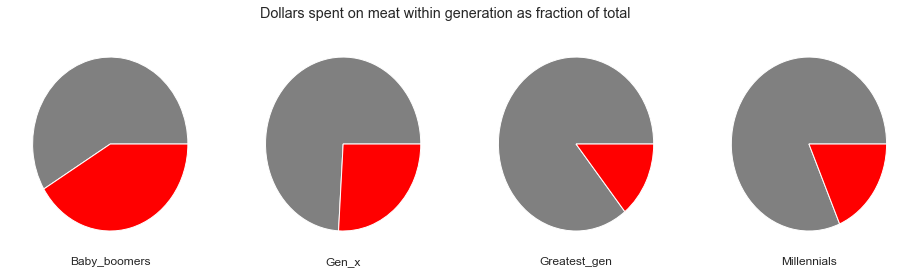

In [147]:
generations = []
for generation in gen_df.columns:
    generation_group_sums = cex_data[cex_data['meat_per_person'] > 0].groupby(generation).sum()
    generations.append((generation, generation_group_sums.loc[0]['meat_log'], generation_group_sums.loc[1]['meat_log']))

fig, ax = plt.subplots(1,4, figsize=(16, 4))
for idx, (name, out_of_gen, in_gen) in enumerate(generations):
    ax.flat[idx].pie([out_of_gen, in_gen], colors=['gray','red'])
    ax.flat[idx].set_xlabel(name)

fig.suptitle('Dollars spent on meat within generation as fraction of total')

plt.show()

Plot Marital Status x Meat per person

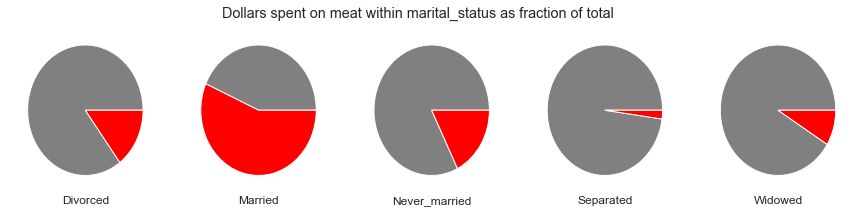

In [152]:
marital_statuses = []
for marital_status in marital_df.columns:
    marital_status_group_sums = cex_data[cex_data['meat_per_person'] > 0].groupby(marital_status).sum()
    marital_statuses.append((marital_status, marital_status_group_sums.loc[0]['meat_log'], marital_status_group_sums.loc[1]['meat_log']))

fig, ax = plt.subplots(1,len(marital_df.columns), figsize=(15, 3))
for idx, (name, out_of_status, in_status) in enumerate(marital_statuses):
    ax.flat[idx].pie([out_of_status, in_status], colors=['gray','red'])
    ax.flat[idx].set_xlabel(name)

fig.suptitle('Dollars spent on meat within marital_status as fraction of total')

plt.show()

Scatter Plot Financial x Meat Per Person

In [ ]:
# plt.scatter(np.where(cex_data['FINCBEF5'] < 60000, cex_data['FINCBEF5'], np.nan),\
#             np.where(cex_data['meat_per_person'] < 100, cex_data['meat_per_person'], np.nan), c=cex_data['FAM_SIZE'], cmap='Set1')
# plt.xlabel('income')
# plt.ylabel('$ on meat')
# cbar = plt.colorbar()
# cbar.ax.get_yaxis().labelpad = 15
# cbar.set_label('# of family members', rotation=270)
# plt.show()

Scatter Plot Financial x Family Size x Meat per person

In [ ]:
# plt.scatter(cex_data['FINCBEF5'],\
#             np.where(cex_data['meat_per_person'] < 100, cex_data['meat_per_person'], np.nan), c=cex_data['FAM_SIZE'], cmap='Set1')
# plt.xlabel('income')
# plt.ylabel('$ on meat')
# cbar = plt.colorbar()
# cbar.ax.get_yaxis().labelpad = 15
# cbar.set_label('# of family members', rotation=270)
# plt.show()

Scatter Plot Veggie x Region x Meat Per Person

In [ ]:
# plt.scatter(np.where(cex_data['veggie_per_person'] < 200, cex_data['veggie_per_person'], np.nan),\
#             np.where(cex_data['meat_per_person'] < 100, cex_data['meat_per_person'], np.nan), c=cex_data['REGION'], cmap='gist_rainbow')
# plt.xlabel('$ on veggie')
# plt.ylabel('$ on meat')
# cbar = plt.colorbar()
# cbar.ax.get_yaxis().labelpad = 15
# space_yticks = ['',codes.region[1],'',codes.region[2],'',codes.region[3],'',codes.region[4]]
# cbar.ax.set_yticklabels(space_yticks)
# cbar.set_label('region', rotation=270)
# plt.show()

Scatter Plot Men x Veggie x Meat 

In [ ]:
# plt.scatter(np.where(cex_data['veggie_per_person'] < 200, cex_data['veggie_per_person'], np.nan),\
#             np.where(cex_data['meat_per_person'] < 100, cex_data['meat_per_person'], np.nan), c=cex_data['Male'], cmap='vlag')
# plt.xlabel('$ on veggie')
# plt.ylabel('$ on meat')
# cbar = plt.colorbar()
# cbar.ax.get_yaxis().labelpad = 15
# space_yticks3 = ['0','','','','','1']
# cbar.ax.set_yticklabels(space_yticks3)
# cbar.set_label('Male', rotation=270)
# plt.show()

Scatter Plot Women x Veggie x Meat 

In [ ]:
# plt.scatter(np.where(cex_data['veggie_per_person'] < 200, cex_data['veggie_per_person'], np.nan),\
#             np.where(cex_data['meat_per_person'] < 100, cex_data['meat_per_person'], np.nan), c=cex_data['Female'], cmap='vlag')
# plt.xlabel('$ on veggie')
# plt.ylabel('$ on meat')
# cbar = plt.colorbar()
# cbar.ax.get_yaxis().labelpad = 15
# space_yticks3 = ['0','','','','','1']
# cbar.ax.set_yticklabels(space_yticks3)
# cbar.set_label('Female', rotation=270)
# plt.show()

Quantiles Meat Per Person x Veggie x Financial Income

In [43]:
low_meat = cex_data['meat_log'].quantile(.25)
high_veggie = cex_data['veggie_log'].quantile(.75)
high_income = cex_data['FINCBEF5'].quantile(.75)

meat score of 0


veggie score of 12 + 7.61


high income > 80000


high education = graduate

45 expected


50 actual

In [44]:
print((.25**4)*len(cex_data))
cex_data[(cex_data['meat_per_person'] == 0) & (cex_data['veggie_per_person'] >= 10.71) & (cex_data['FINCBEF5'] > 102204)\
         & (cex_data['Graduate_degree'] == 1)]

45.5390625


,INC_RNKM,INC_RNK5,INC_RNK4,INC_RNK3,INC_RNK2,INC_RNK1,INC_RANK,NEWID,AGE_REF,AGE_REF_,...,OCC_Other service,OCC_Private household service,OCC_Professional,OCC_Protective service,"OCC_Sales, business goods and services","OCC_Sales, retail",OCC_Teacher,OCC_Technician,OCC_Transportation operator,OCC_Unknown
93,0.945627,0.945768,0.944118,0.945443,0.945167,0.945759,0.976474,03609831,56,D,...,0,0,1,0,0,0,0,0,0,0
94,0.946012,0.946154,0.944504,0.945829,0.945553,0.946145,0.976859,03609832,56,D,...,0,0,1,0,0,0,0,0,0,0
108,0.881524,0.875586,0.876512,0.878808,0.877897,0.880427,0.908729,03610012,72,D,...,0,0,0,0,0,0,0,0,0,1
761,0.903310,0.903511,0.901642,0.904261,0.902492,0.902607,0.930488,03617191,52,D,...,0,0,0,0,0,0,1,0,0,0
797,0.923693,0.922768,0.920408,0.922797,0.920721,0.921245,0.946806,03617661,75,D,...,0,0,0,0,0,0,0,0,0,0
889,0.987702,0.987249,0.987300,0.987601,0.987090,0.986766,0.992592,03618802,37,D,...,0,0,0,0,0,0,1,0,0,0
936,0.967301,0.966291,0.967329,0.966179,0.966208,0.967447,0.962127,03619281,56,D,...,0,0,0,1,0,0,0,0,0,0
1182,0.907047,0.906308,0.904696,0.906885,0.906116,0.905240,0.933835,03622121,63,D,...,0,0,0,0,0,0,0,0,0,1
1353,0.978124,0.976830,0.977755,0.977647,0.977987,0.977791,0.982154,03623782,64,D,...,0,0,0,0,0,0,0,0,0,0
1472,0.993827,0.994096,0.993608,0.994011,0.992954,0.993073,0.992169,03625132,74,D,...,0,0,0,0,0,0,0,0,0,0


Scatter Plot Veggie x Meat x Financial (Closer Look)

In [ ]:
# plt.scatter(np.where(cex_data['veggie_per_person']/cex_data['FINCBEF5'] < .05, cex_data['veggie_per_person']/cex_data['FINCBEF5'], np.nan),\
#             np.where(cex_data['meat_per_person']/cex_data['FINCBEF5'] < .05, cex_data['meat_per_person']/cex_data['FINCBEF5'], np.nan), c=cex_data['REGION'], cmap='gist_rainbow')
# plt.xlabel('$ on veggie')
# plt.ylabel('$ on meat')
# cbar = plt.colorbar()
# cbar.ax.get_yaxis().labelpad = 15
# space_yticks2 = [codes.region[1],'',codes.region[2],'','','',codes.region[3],'',codes.region[4]]
# cbar.ax.set_yticklabels(space_yticks2)
# cbar.set_label('region', rotation=270)
# plt.show()

In [62]:
#train-test split
from sklearn.model_selection import train_test_split

meat_above_zero_df = cex_data[(cex_data['meat_per_person'] > 0)]
meat_above_zero_df.loc[:, 'lonely_rich_man'] = meat_above_zero_df['Income_80000-840000'] * meat_above_zero_df['Fam_one_member'] * meat_above_zero_df['Male']
columns = ['lonely_rich_man']
columns.extend(['Northeast','Midwest','West','South'])
columns.extend(edu_df.columns)
columns.extend(income_df.columns)
columns.extend(gen_df.columns)
columns.extend(sex_df.columns)
columns.extend(fam_size_df.columns)
columns.extend(marital_df.columns)
features_df = meat_above_zero_df[columns]
target_df = meat_above_zero_df['meat_log']


33


In [79]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn import linear_model
from sklearn import metrics


poly_2 = PolynomialFeatures(degree=2, interaction_only=False)


df_poly_2= pd.DataFrame(poly_2.fit_transform(features_df), columns=poly_2.get_feature_names(features_df.columns))
X2_train, X2_test, y2_train, y2_test = train_test_split(df_poly_2[['Fam_greater_than_4', 'Fam_one_member','Income_80000-840000 Fam_greater_than_4','Income_80000-840000 Fam_one_member', 'Baby_boomers Fam_one_member','Gen_x Fam_greater_than_4', 'Female Fam_greater_than_4','Fam_greater_than_4^2', 'Fam_greater_than_4 Married','Fam_one_member^2']], target_df,test_size=0.2)


lm2 = linear_model.LinearRegression()
lm2 = lm2.fit(X2_train, y2_train)

y2_train_pred = lm2.predict(X2_train)
y2_test_pred = lm2.predict(X2_test)
print(metrics.r2_score(y2_test, y2_test_pred))
metrics.r2_score(y2_train, y2_train_pred)


0.09347090665138391


0.06760332964256577

In [ ]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn import linear_model
from sklearn import metrics


poly_3 = PolynomialFeatures(degree=3, interaction_only=False)


df_poly_3= pd.DataFrame(poly_3.fit_transform(features_df), columns=poly_3.get_feature_names(features_df.columns))
X3_train, X3_test, y3_train, y3_test = train_test_split(df_poly_3, target_df,test_size=0.3)


lm3 = linear_model.LinearRegression()
lm3 = lm3.fit(X3_train, y3_train)

y3_train_pred = lm3.predict(X3_train)
y3_test_pred = lm3.predict(X3_test)
metrics.r2_score(y3_test,y3_test_pred)
#metrics.r2_score(y3_train,y3_train_pred)


In [67]:
from sklearn.feature_selection import SelectKBest, f_regression

selector = SelectKBest(f_regression, k=10)

selector.fit(X2_train, y2_train)

selected_columns = X2_train.columns[selector.get_support()]

selected_columns


/Users/brendan.gilroy/anaconda3/envs/learn-env/lib/python3.7/site-packages/sklearn/feature_selection/univariate_selection.py:299: RuntimeWarning: divide by zero encountered in true_divide
  corr /= X_norms
/Users/brendan.gilroy/anaconda3/envs/learn-env/lib/python3.7/site-packages/sklearn/feature_selection/univariate_selection.py:299: RuntimeWarning: invalid value encountered in true_divide
  corr /= X_norms
/Users/brendan.gilroy/anaconda3/envs/learn-env/lib/python3.7/site-packages/sklearn/feature_selection/univariate_selection.py:304: RuntimeWarning: invalid value encountered in true_divide
  F = corr ** 2 / (1 - corr ** 2) * degrees_of_freedom
/Users/brendan.gilroy/anaconda3/envs/learn-env/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in greater
  return (self.a < x) & (x < self.b)
/Users/brendan.gilroy/anaconda3/envs/learn-env/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure.py:879: RuntimeWarning: invalid

Index(['Fam_greater_than_4', 'Fam_one_member',
       'Income_80000-840000 Fam_greater_than_4',
       'Income_80000-840000 Fam_one_member', 'Baby_boomers Fam_one_member',
       'Gen_x Fam_greater_than_4', 'Female Fam_greater_than_4',
       'Fam_greater_than_4^2', 'Fam_greater_than_4 Married',
       'Fam_one_member^2'],
      dtype='object')

In [72]:
from sklearn.feature_selection import SelectKBest, f_regression

selector = SelectKBest(f_regression, k=10)

selector.fit(features_df, target_df)

selected_columns = features_df.columns[selector.get_support()]

selected_columns = selected_columns.to_list()

kbest_df = features_df[selected_columns]

In [80]:
X4_train, X4_test, y4_train, y4_test = train_test_split(kbest_df, target_df,test_size=0.2)
lm4 = linear_model.LinearRegression()

lm4 = lm4.fit(X4_train, y4_train)
y4_train_pred = lm4.predict(X4_train)
print(metrics.r2_score(y4_train, y4_train_pred))
y4_test_pred = lm4.predict(X4_test)
metrics.r2_score(y4_test, y4_test_pred)

0.11087601328086705


0.0957363677206946